In [4]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('/content/Instagram Influencer Dataset.csv')



In [4]:
df.Username.unique()

array(['makeupbynvs', 'jaquelinevandoski', 'anisaartistry', ...,
       'ester_starling', 'lovely___yul', 'sara_agos'], dtype=object)

In [2]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

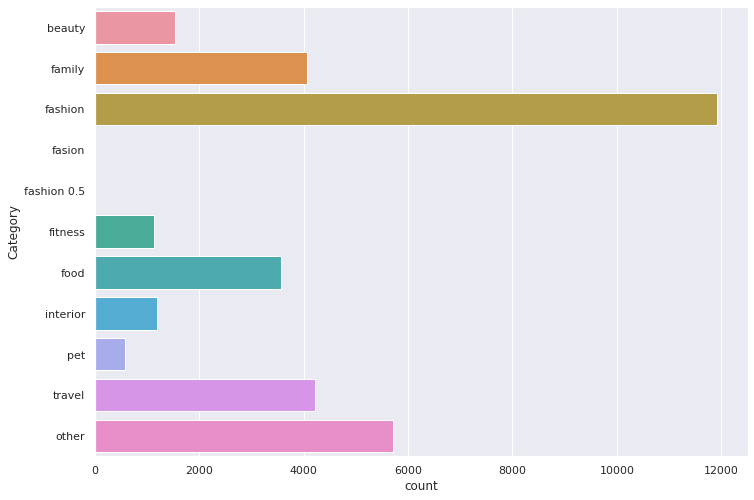

In [5]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(y='Category', data=df)
plt.show()

In [39]:
profile_df = pd.DataFrame(df.Username.unique(), columns=['Username'])
profile_df

,Username
0,makeupbynvs
1,jaquelinevandoski
2,anisaartistry
3,rubina_muartistry
4,beautyxabbi
...,...
33930,alingzhang
33931,flower.jini
33932,ester_starling
33933,lovely___yul


In [40]:
followers_df = df.groupby('Username', as_index=False).agg({'#Followers':'min'})
followers_df

,Username,#Followers
0,00_rocketgirl,6453
1,00s_supermodels,2031
2,0720_b,31521
3,0821_me,111768
4,0ldisme,18583
...,...,...
33930,zweigyossi,3223
33931,zwhite216,8159
33932,zwithlove,4487
33933,zyda16,3788


In [76]:
profile_df = profile_df.merge(followers_df, on='Username')
profile_df

,Username,Category,#Followees,#Followers
0,00_rocketgirl,other,710,6453
1,00s_supermodels,fashion,53,2031
2,0720_b,fashion,2202,31521
3,0821_me,food,1601,111768
4,0ldisme,interior,523,18583
...,...,...,...,...
33930,zweigyossi,other,3453,3223
33931,zwhite216,other,1054,8159
33932,zwithlove,fashion,858,4487
33933,zyda16,fashion,948,3788


In [26]:
profile_df.drop(['#Followers_x','#Followers_y'],axis=1,inplace=True)

In [42]:
profile_df.head()

,Username,#Followers
0,makeupbynvs,1432
1,jaquelinevandoski,137600
2,anisaartistry,64644
3,rubina_muartistry,496406
4,beautyxabbi,2050


In [29]:
df.head()

,Username,Category,#Followers,#Followees,#Posts
0,makeupbynvs,beauty,1432,1089,363
1,jaquelinevandoski,beauty,137600,548,569
2,anisaartistry,beauty,64644,289,391
3,rubina_muartistry,beauty,496406,742,887
4,beautyxabbi,beauty,2050,1423,751


In [74]:
followee_df = df.groupby('Username', as_index=False).agg({'#Followees':'min'})
followee_df

,Username,#Followees
0,00_rocketgirl,710
1,00s_supermodels,53
2,0720_b,2202
3,0821_me,1601
4,0ldisme,523
...,...,...
33930,zweigyossi,3453
33931,zwhite216,1054
33932,zwithlove,858
33933,zyda16,948


In [75]:
profile_df = profile_df.merge(followee_df, on='Username')


In [44]:
profile_df

,Username,#Followers
0,makeupbynvs,1432
1,jaquelinevandoski,137600
2,anisaartistry,64644
3,rubina_muartistry,496406
4,beautyxabbi,2050
...,...,...
33930,alingzhang,4597
33931,flower.jini,27093
33932,ester_starling,20621
33933,lovely___yul,12381


In [62]:
df_Category['Category']=pd.DataFrame({'Category':df.Category.unique()})

In [63]:
df_Category

,Category
0,beauty
1,family
2,fashion
3,fasion
4,fashion 0.5
5,fitness
6,food
7,interior
8,pet
9,travel


In [73]:
profile_df =  df.groupby('Username', as_index=False).agg({'Category':'sum'})
profile_df

,Username,Category
0,00_rocketgirl,other
1,00s_supermodels,fashion
2,0720_b,fashion
3,0821_me,food
4,0ldisme,interior
...,...,...
33930,zweigyossi,other
33931,zwhite216,other
33932,zwithlove,fashion
33933,zyda16,fashion


In [77]:
profile_df.head()

,Username,Category,#Followees,#Followers
0,00_rocketgirl,other,710,6453
1,00s_supermodels,fashion,53,2031
2,0720_b,fashion,2202,31521
3,0821_me,food,1601,111768
4,0ldisme,interior,523,18583


In [78]:
from sklearn.cluster import KMeans

In [79]:
km = KMeans(n_clusters=2, #Number of clusters
            n_init=10, #How many times KMeans will be run with random centoid starts
            max_iter=300) #Maximum iterations

In [80]:
km.fit(profile_df[['#Followees', '#Followers']])

KMeans(n_clusters=2, n_init=10)

In [81]:
profile_df['k_2'] = km.predict(profile_df[['#Followees', '#Followers']])

In [82]:
km.cluster_centers_

array([[1.53179227e+03, 1.26177247e+05],
       [5.42714286e+02, 6.87360930e+07]])

In [83]:
profile_df.groupby('k_2').agg({'#Followees':'median', 
                            '#Followers':'median'})

,#Followees,#Followers
k_2,,
0,975.0,16108.5
1,240.0,70694795.0


<AxesSubplot:xlabel='#Followees', ylabel='#Followers'>

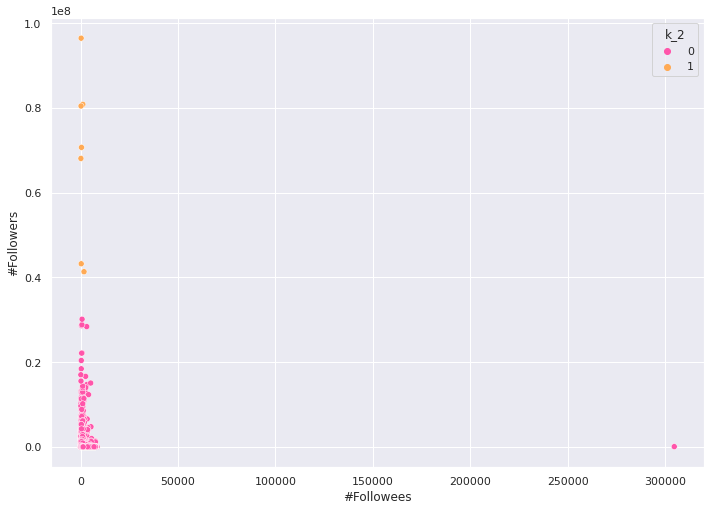

In [84]:
sns.scatterplot(x='#Followees', y='#Followers', hue='k_2', data=profile_df, palette='spring')


In [86]:
print(profile_df.groupby('k_2').agg({'#Followees':'median', '#Followers':'median'}))

     #Followees  #Followers
k_2                        
0         975.0     16108.5
1         240.0  70694795.0
